In [4]:
from matplotlib import pyplot, cm
from math import pi
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']= 16

In [5]:
def L1norm(new,old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [46]:
def stream_2d(psi, w, dx, dy, l1_target):

    l1_norm_psi = 1. 
    l1norm_w = 1.
    iterations = 0
    
    while l1_norm_psi > l1_target or l1norm_w > l1_target:

        psid = psi.copy()
        wn = w.copy()

        psi[1:-1,1:-1] = 1./(2*(dx**2 + dy**2)) * \
                        ((psid[1:-1,2:]+psid[1:-1,:-2])*dy**2 +\
                        (psid[2:,1:-1] + psid[:-2,1:-1])*dx**2 +\
                         w[1:-1,1:-1]*dx**2*dy**2)
    
        l1_norm_psi = L1norm(psid,psi)
        
        
        
        w[1:-1,1:-1] = .25 * (wn[1:-1,2:] + wn[1:-1, :-2] \
                              + wn[2:, 1:-1] + wn[:-2, 1:-1])
        
        #neumann BC for w
        w[1:-1,0] = -(4*psi[1:-1,1] - 0.5*psi[1:-1,2])/dx**2    #left BC x=0
        w[1:-1,-1] = -(4*psi[1:-1,-2] - 0.5*psi[1:-1,-3])/dx**2    #right BC x=l
        w[0,1:-1] = -(4*psi[1,1:-1] - 0.5*psi[2,1:-1])/dy**2    #bottom BC y=0
        w[-1,1:-1] = -(4*psi[-2,1:-1] - 0.5*psi[-3,1:-1])/dy**2 - 3*uj/dy    #top BC y=h
        
        
        
        l1norm_w = L1norm(wn,w)
        iterations += 1
        
    
    print('Number of Jacobi iterations: {0:d}'.format(iterations))
    return psi, w

In [47]:
nx = 41.
ny = 41.
l = 1
h = 1
dx = l/(nx-1)
dy = h/(ny-1)
uj = 1.

x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)
X,Y = numpy.meshgrid(x,y)

psi_i = numpy.zeros((ny,nx))    #dir BC all =0
w_i = numpy.zeros((ny,nx))

l1_target = 1e-6

/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [48]:
psi, w = stream_2d(psi_i.copy(), w_i.copy(), dx, dy, l1_target)

Number of Jacobi iterations: 4060


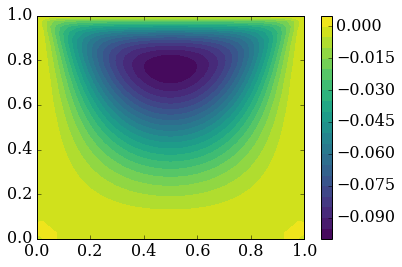

In [52]:
pyplot.contourf(x,y,psi,20,cmap=cm.viridis)
pyplot.colorbar();

In [51]:
numpy.round(psi[32,::8],4)

array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])

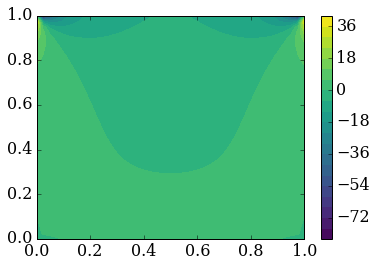

In [53]:
pyplot.contourf(x,y,w,20,cmap=cm.viridis)
pyplot.colorbar();

In [77]:
numpy.amax(abs(psi))

0.099845172462224338

In [78]:
numpy.amax(abs(w))

78.192661228600713